In [ ]:
# 데이터가 적은 경우 모델을 일반화 시키기가 어렵다, 과대 적합의 가능성이 매우 높아진다. 

In [1]:
from keras.utils import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator 

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
train_datagen = ImageDataGenerator(horizontal_flip = True,
                                   vertical_flip = True,
                                   shear_range=0.5,
                                   brightness_range = [0.5,1.5],
                                   zoom_range = 0.2,
                                   width_shift_range = 0.1,
                                   height_shift_range = 0.1,
                                   rotation_range = 30,
                                   fill_mode = 'nearest'
                                   )

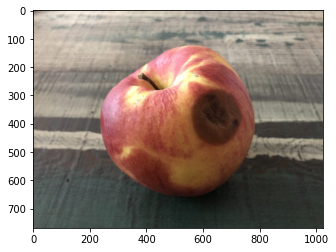

In [9]:
img = img_to_array(load_img('/content/stale_apple.jpeg')).astype(np.uint8)
plt.imshow(img)

In [10]:
(1,)+img.shape

(1, 768, 1024, 3)

In [11]:
result =  img.reshape((1,)+img.shape)
img.shape, result.shape
# newaxis, dim, reshape() -1를 사용한한

((768, 1024, 3), (1, 768, 1024, 3))

In [12]:
train_generator = train_datagen.flow(result, batch_size=1)
# nd array로 만들어져 있다.

In [20]:
next(train_generator)
train_generator[0][0][0]

array([[247., 229., 212.],
       [247., 229., 212.],
       [247., 229., 212.],
       ...,
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.]], dtype=float32)

In [22]:
next(train_generator)
train_generator[0][0][0]

array([[142., 138., 131.],
       [143., 139., 132.],
       [144., 139., 132.],
       ...,
       [ 99.,  92.,  86.],
       [ 98.,  92.,  85.],
       [ 98.,  92.,  85.]], dtype=float32)

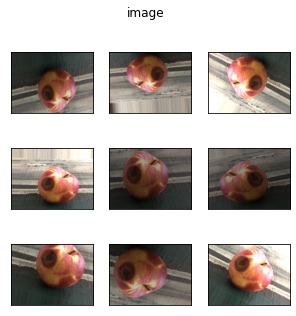

In [14]:
fig = plt.figure(figsize=(5,5))
fig.suptitle('image')

for i in range(9):
  data = next(train_generator)
  # print(data.shape)
  image = data[0]
  plt.subplot(3,3,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(np.array(image,dtype=np.uint8))
  # print(image.min(),image.max())
plt.show()

In [ ]:
from keras.datasets import cifar10
import numpy as np
from sklearn.model_selection import train_test_split

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_mean = np.mean(x_train,axis=(0,1,2))
x_std = np.std(x_train,axis=(0,1,2))

x_train=(x_train-x_mean)/x_std
x_test =(x_test-x_mean)/x_std

x_train,x_val,y_train,y_val = train_test_split(x_train,y_train,test_size=0.3,random_state=777)

170498071/170498071 [==============================] - 2s 0us/step


In [ ]:
train_datagen = ImageDataGenerator(horizontal_flip = True,
                                   zoom_range = 0.2,
                                   width_shift_range = 0.1,
                                   height_shift_range = 0.1,
                                   rotation_range = 30,
                                   fill_mode = 'nearest'
                                   )

val_datagen = ImageDataGenerator()

batch_size = 32

train_generator = train_datagen.flow(x_train,y_train, batch_size= batch_size)
val_generator = val_datagen.flow(x_val, y_val, batch_size = batch_size)



In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Dense,Flatten,Activation,BatchNormalization
from keras.optimizers import Adam

model = Sequential([
    Conv2D(filters=32,kernel_size=3,padding='same',input_shape=(32, 32, 3)),
    BatchNormalization(),
    Activation('relu'),
    #액티베이션을 별도로로
    #액티베이션으로 넘기기 전에 배치 정규화를 수행한다.


    Conv2D(filters=32,kernel_size=3,padding='same'),
    BatchNormalization(),
    Activation('relu'),

    MaxPool2D(pool_size=(2,2),strides=2,padding='same'),

    Conv2D(filters=64,kernel_size=3,padding='same'),
    BatchNormalization(),
    Activation('relu'),

    Conv2D(filters=64,kernel_size=3,padding='same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPool2D(pool_size=(2,2),strides=2,padding='same'),

    Conv2D(filters=128,kernel_size=3,padding='same'),
    BatchNormalization(),
    Activation('relu'),

    Conv2D(filters=128,kernel_size=3,padding='same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPool2D(pool_size=(2,2),strides=2,padding='same'),



    Flatten(),
    Dense(256),
    BatchNormalization(),
    Activation('relu'),
    Dense(10,activation='softmax')
])

model.compile(optimizer=Adam(1e-4),loss='sparse_categorical_crossentropy',metrics=['acc'])

def get_step(train_len, batch_size):
  if(train_len % batch_size >0 ):
    return train_len // batch_size + 1
    
  else:
    return train_len // batch_size

history = model.fit(train_generator,
                    epochs=30,
                    steps_per_epoch= get_step(len(x_train), batch_size),
                    validation_data=val_generator,
                    validation_steps = get_step(len(x_val), batch_size)
                    )

Epoch 1/30
1094/1094 [==============================] - 44s 31ms/step - loss: 1.6185 - acc: 0.0971 - val_loss: 1.3071 - val_acc: 0.0862
Epoch 2/30
1094/1094 [==============================] - 24s 22ms/step - loss: 1.3466 - acc: 0.1030 - val_loss: 1.2825 - val_acc: 0.0967
Epoch 3/30
1094/1094 [==============================] - 26s 24ms/step - loss: 1.2356 - acc: 0.1043 - val_loss: 1.1402 - val_acc: 0.0757
Epoch 4/30
1094/1094 [==============================] - 26s 24ms/step - loss: 1.1424 - acc: 0.1026 - val_loss: 1.0156 - val_acc: 0.0905
Epoch 5/30
1094/1094 [==============================] - 25s 23ms/step - loss: 1.0733 - acc: 0.1036 - val_loss: 0.9188 - val_acc: 0.0893
Epoch 6/30
1094/1094 [==============================] - 28s 26ms/step - loss: 1.0176 - acc: 0.1039 - val_loss: 1.1030 - val_acc: 0.0925
Epoch 7/30
1094/1094 [==============================] - 26s 24ms/step - loss: 0.9684 - acc: 0.1045 - val_loss: 0.8840 - val_acc: 0.1005
Epoch 8/30
1094/1094 [==========================

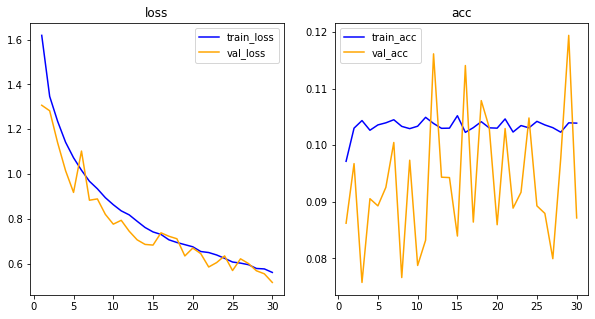

In [ ]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss']

epochs = range(1,len(loss)+1)
fig = plt.figure(figsize=(10,5))

ax1 = fig.add_subplot(1,2,1)
ax1.plot(epochs,loss,color='blue',label='train_loss')
ax1.plot(epochs,val_loss,color='orange',label='val_loss')
ax1.set_title('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

ax2 = fig.add_subplot(1,2,2)
ax2.plot(epochs,acc,color='blue',label='train_acc')
ax2.plot(epochs,val_acc,color='orange',label='val_acc')
ax2.set_title('acc')
ax2.legend()

plt.show()

In [ ]:
pred = model.predict(x_test)

<bound method Model.predict of <keras.engine.sequential.Sequential object at 0x7f28b193fcd0>>

In [ ]:
np.round(np.round(pred[0],2))

In [ ]:
test_datagen = ImageDataGenerator()
test_generator = test_datagen.flow(x_test, batch_size = batch_size)
pred = model.predict(x_test)
np.argmax(np.round(pred[0],2))

313/313 [==============================] - 2s 5ms/step


3

In [ ]:
test_datagen = ImageDataGenerator()
test_generator = test_datagen.flow_from_directory('./data', batch_size = batch_size)

pred = model.predict(x_test)
np.argmax(np.round(pred[0],2))

FileNotFoundError: ignored